In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk

In [9]:
# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Load dataset
file_path = "train.csv"  # Update this if needed
data = pd.read_csv(file_path)

In [11]:
# Check for missing values
data.dropna(inplace=True)

In [12]:
# Convert text to lowercase
data['review'] = data['review'].str.lower()

In [13]:
# Remove stopwords
stop_words = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [14]:
# Convert categorical labels to numerical (positive -> 1, negative -> 0)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [15]:
# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['review'])
y = data['sentiment']

In [16]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Train Model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [18]:
# Predictions & Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      7411
           1       0.89      0.84      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.87      0.86      0.86     15000



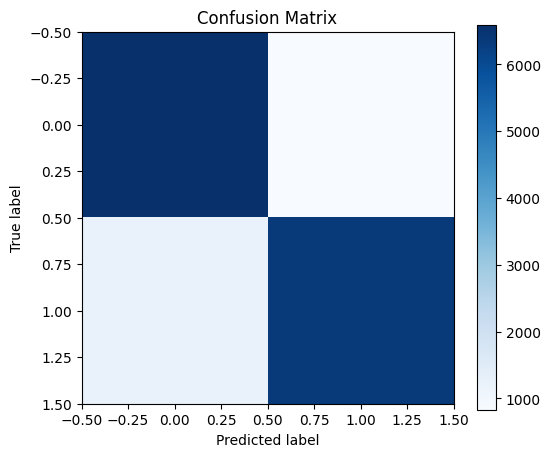

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()